In [1]:
print("Hello Universe")

Hello Universe


___Download the eccentricity distribution of exoplanets from the exoplanet catalog http://exoplanet.eu/catalog/. Look for the column titled e, which denotes eccentricity. Draw the histogram of this distribution. Then redraw the same histogram after Gaussianization of  the distribution using Box-transformation either using scipy.stats.boxcox or from first principles using the equations  in arXiv:1508.00931. Note that exoplanets without eccentricity data can be ignored.
After Box-cox transformation you should get a plot similar to the right side of figure 1 in arXiv:1508.00931.___

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# http://exoplanet.eu/catalog/
dataset = pd.read_csv("/Users/dhruvkumar/Desktop/exoplanet.eu_catalog.csv")

In [6]:
dataset

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,16.1284,1.500,1.500,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.00,3.00,3.00,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,NaN,NaN,NaN,11.0873,1.100,1.100,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,NaN,NaN,NaN,4.6840,0.230,0.230,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,9.10,NaN,NaN,5.2150,NaN,NaN,NaN,NaN,...,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,ups And c,Confirmed,9.10,2.93,5.04,1.8000,0.260,0.260,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
4975,ups And d,Confirmed,23.58,2.29,2.93,10.1900,NaN,NaN,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
4976,ups And e,Confirmed,NaN,NaN,NaN,1.0590,0.028,0.028,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
4977,ups Leo b,Confirmed,NaN,NaN,NaN,0.5100,0.260,0.080,NaN,NaN,...,G9 III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
e = dataset.eccentricity

In [30]:
dataset.eccentricity

0       0.23100
1           NaN
2       0.08000
3       0.00000
4       0.36900
         ...   
4974    0.24450
4975    0.31600
4976    0.00536
4977    0.32000
4978        NaN
Name: eccentricity, Length: 4979, dtype: float64

Text(0, 0.5, 'Number of Planets')

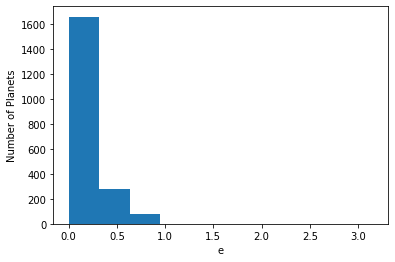

In [87]:
plt.hist(e) # ecentricity
plt.xlabel("e")
plt.ylabel("Number of Planets")

In [88]:
import scipy 

In [89]:
from scipy.stats import boxcox

Text(0, 0.5, 'dN')

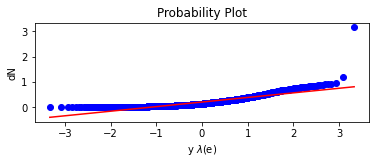

In [90]:
data = e[e > 0]
fig = plt.figure()
ax1 = fig.add_subplot(211)
e = dataset.eccentricity 
prob = stats.probplot(data,dist=stats.norm,plot=ax1)
ax1.set_xlabel('y $\lambda$(e)')
ax1.set_ylabel('dN')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eccentricity', ylabel='Density'>

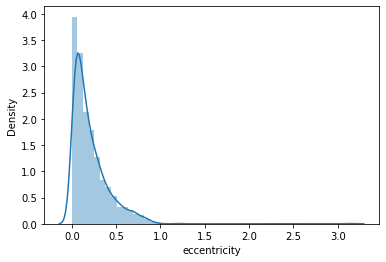

In [105]:
#load necessary packages
import numpy as np 
from scipy.stats import boxcox 
import seaborn as sns 

#make this example reproducible
np.random.seed(42)

#generate dataset

#plot the distribution of data values
sns.distplot(data, hist=True, kde=True) 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

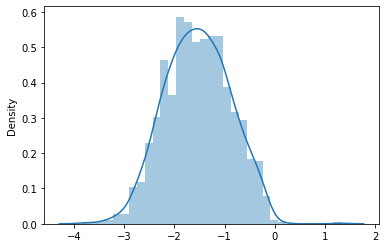

In [103]:
#perform Box-Cox transformation on original data
transformed_data, best_lambda = boxcox(data) 

#plot the distribution of the transformed data values
sns.distplot(transformed_data, hist=True, kde=True) 

In [101]:
#display optimal lambda value
print(best_lambda)

0.24271536730189142
